# Gaussian Process

Gaussian Processes (GP) are a generic supervised learning method designed to solve regression and probabilistic classification problems. 

https://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process

In [48]:
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats

from MLP.mlp_regression import mlp_regression, model_validation, mlp_prediction, mlp_prediction_error, mlp_train_graph, errorDist, mlp_train_multi_graph, mlp_train_multi_graph_comb, mlp_train_multi_3dgraph_comb
from MLP.utils import data_loader_pathloss, describeData, data_loader_pathloss_with_freq
from GMM.utils import gp_train_multi_3dgraph, gp_ann_train_multi_3dgraph

pd.set_option('display.max_rows', 999)
pd.set_option('precision', 5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload
X_train_bh_34, y_train_bh_34, X_val_bh_34, y_val_bh_34, X_test_bh_34, y_test_bh_34 = data_loader_pathloss('data/PLdata_bh_34.mat')
X_train_bh_53, y_train_bh_53, X_val_bh_53, y_val_bh_53, X_test_bh_53, y_test_bh_53 = data_loader_pathloss('data/PLdata_bh_53.mat')
X_train_bh_64, y_train_bh_64, X_val_bh_64, y_val_bh_64, X_test_bh_64, y_test_bh_64 = data_loader_pathloss('data/PLdata_bh_64.mat')

X_train_bh = np.concatenate((X_train_bh_34, X_train_bh_53), axis=0)
y_train_bh = np.concatenate((y_train_bh_34, y_train_bh_53),axis=0)
X_train_bh = np.concatenate((X_train_bh, X_train_bh_64), axis=0)
y_train_bh = np.concatenate((y_train_bh, y_train_bh_64),axis=0)

X_val_bh = np.concatenate((X_val_bh_34, X_val_bh_53), axis=0)
y_val_bh = np.concatenate((y_val_bh_34, y_val_bh_53),axis=0)
X_val_bh = np.concatenate((X_val_bh, X_val_bh_64), axis=0)
y_val_bh = np.concatenate((y_val_bh, y_val_bh_64),axis=0)

X_test_bh = np.concatenate((X_test_bh_34, X_test_bh_53), axis=0)
y_test_bh = np.concatenate((y_test_bh_34, y_test_bh_53),axis=0)
X_test_bh = np.concatenate((X_test_bh, X_test_bh_64), axis=0)
y_test_bh = np.concatenate((y_test_bh, y_test_bh_64),axis=0)

X_train_ma_34, y_train_ma_34, X_val_ma_34, y_val_ma_34, X_test_ma_34, y_test_ma_34 = data_loader_pathloss('data/PLdata_ma_34.mat')
X_train_ma_53, y_train_ma_53, X_val_ma_53, y_val_ma_53, X_test_ma_53, y_test_ma_53 = data_loader_pathloss('data/PLdata_ma_53.mat')
X_train_ma_64, y_train_ma_64, X_val_ma_64, y_val_ma_64, X_test_ma_64, y_test_ma_64 = data_loader_pathloss('data/PLdata_ma_64.mat')

X_train_ma = np.concatenate((X_train_ma_34, X_train_ma_53), axis=0)
y_train_ma = np.concatenate((y_train_ma_34, y_train_ma_53),axis=0)
X_train_ma = np.concatenate((X_train_ma, X_train_ma_64), axis=0)
y_train_ma = np.concatenate((y_train_ma, y_train_ma_64),axis=0)

X_val_ma = np.concatenate((X_val_ma_34, X_val_ma_53), axis=0)
y_val_ma = np.concatenate((y_val_ma_34, y_val_ma_53),axis=0)
X_val_ma = np.concatenate((X_val_ma, X_val_ma_64), axis=0)
y_val_ma = np.concatenate((y_val_ma, y_val_ma_64),axis=0)

X_test_ma = np.concatenate((X_test_ma_34, X_test_ma_53), axis=0)
y_test_ma = np.concatenate((y_test_ma_34, y_test_ma_53),axis=0)
X_test_ma = np.concatenate((X_test_ma, X_test_ma_64), axis=0)
y_test_ma = np.concatenate((y_test_ma, y_test_ma_64),axis=0)

<Bundang>


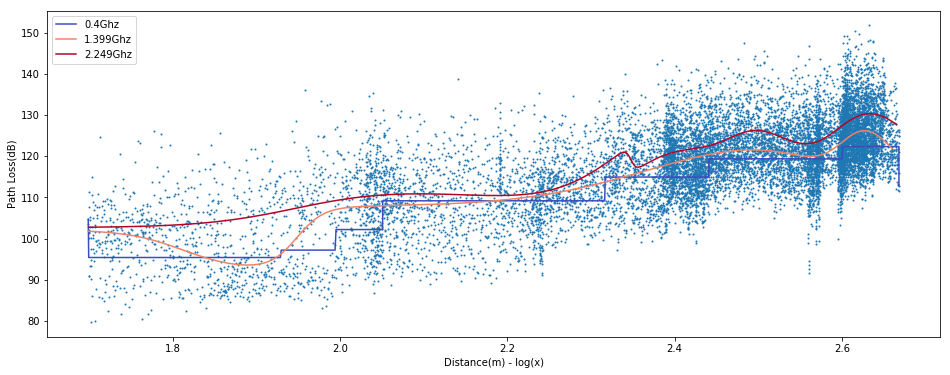

RMSE(dB),train error,test error
3.4Ghz,6.85697,6.99670
5.3Ghz,6.84997,6.91477
6.4Ghz,7.36357,7.43074


In [3]:
%autoreload
dataX = list()
dataY = list()
dataPredX = list()
model_34 = mlp_regression(X_train_bh_34, y_train_bh_34, (60), 'logistic', 'lbfgs')
dataX.append(X_train_bh_34)
dataY.append(y_train_bh_34)
dataPredX.append(model_34.predict(X_train_bh_34))
model_53 = mlp_regression(X_train_bh_53, y_train_bh_53, (60), 'logistic', 'lbfgs')
dataX.append(X_train_bh_53)
dataY.append(y_train_bh_53)
dataPredX.append(model_53.predict(X_train_bh_53))
model_64 = mlp_regression(X_train_bh_64, y_train_bh_64, (60), 'logistic', 'lbfgs')
dataX.append(X_train_bh_64)
dataY.append(y_train_bh_64)
dataPredX.append(model_64.predict(X_train_bh_64))

print("<Bundang>")
mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_bh, y_train_bh, 'distance')

stat = np.array([mlp_prediction_error(model_34,X_train_bh_34, y_train_bh_34), mlp_prediction_error(model_34,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model_53,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model_53,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model_64,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model_64,X_test_bh_64, y_test_bh_64)])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

In [5]:
X = dataX[0]
y = dataY[0]

# Instantiate a Gaussian Process model
# kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
# kernel = 1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) \
#    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
# gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0)
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

GaussianProcessRegressor(alpha=0.0, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1e-05),
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

<Bundang, 3.4Ghz> Pathloss Estimation using Gaussian Process


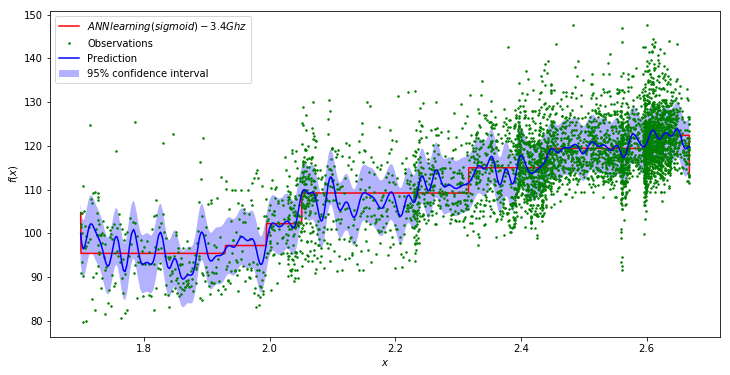

In [6]:
# Make the prediction on the meshed x-axis (ask for MSE as well)
print("<Bundang, 3.4Ghz> Pathloss Estimation using Gaussian Process")
y_pred, sigma = gp.predict(X, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure(figsize=(12,6))
plt.plot(X, dataPredX[0], 'r-', label=r'$ANN learning(sigmoid) - 3.4Ghz$')
plt.plot(X, y, 'g.', markersize=3, label=u'Observations')
plt.plot(X, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([X, X[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.3, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
# plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

In [7]:
rmse = np.sqrt(np.mean(np.power(y-y_pred,2)))
print("Gaussian Process RMSE: " + str(rmse))

Gaussian Process RMSE: 6.676752821800759


Pathloss Noise modeling(3D) - 3.4Ghz Bundang


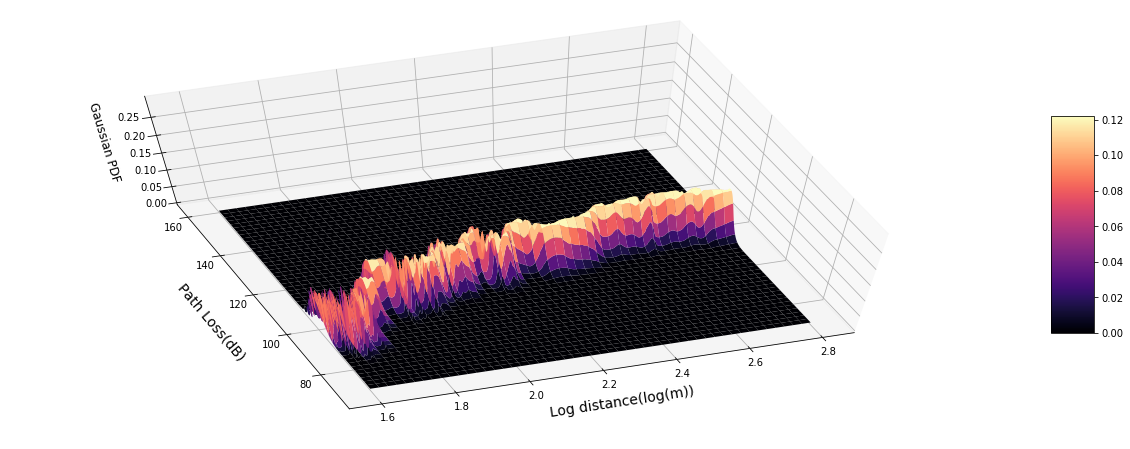

In [129]:
import scipy.stats
from matplotlib import cm

x = np.linspace(1.6, 2.8, 3000)
y = np.linspace(70, 160, 3000)
z = np.zeros((len(x), len(y)))
for t in range(len(x)):
    gd = scipy.stats.norm(y_pred[t], sigma[t])
    z[t] = np.array(gd.pdf(y))
# print(z)

print('Pathloss Noise modeling(3D) - 3.4Ghz Bundang')

fig = plt.figure()
fig.set_figwidth(22)
fig.set_figheight(8)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x.reshape(-1,1), y, z, cmap=cm.magma, linewidth=0, antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title
# ax.view_init(75, 255)
ax.view_init(elev=65, azim=250)
ax.set_zlim(0.0,0.3)
ax.set_xlabel("Log distance(log(m))",labelpad=18,fontsize=14)
ax.set_ylabel("Path Loss(dB)",labelpad=18,fontsize=14)
ax.set_zlabel("Gaussian PDF",labelpad=10,fontsize=12)

#plt.axis('tight')
plt.show()

In [2]:
%autoreload
X_train_bh_34, y_train_bh_34, X_val_bh_34, y_val_bh_34, X_test_bh_34, y_test_bh_34 = data_loader_pathloss_with_freq('data/PLdata_bh_34.mat',np.log10(3400))
X_train_bh_53, y_train_bh_53, X_val_bh_53, y_val_bh_53, X_test_bh_53, y_test_bh_53 = data_loader_pathloss_with_freq('data/PLdata_bh_53.mat',np.log10(5300))
X_train_bh_64, y_train_bh_64, X_val_bh_64, y_val_bh_64, X_test_bh_64, y_test_bh_64 = data_loader_pathloss_with_freq('data/PLdata_bh_64.mat',np.log10(6400))

X_train_bh = np.concatenate((X_train_bh_34, X_train_bh_53), axis=0)
y_train_bh = np.concatenate((y_train_bh_34, y_train_bh_53),axis=0)
X_train_bh = np.concatenate((X_train_bh, X_train_bh_64), axis=0)
y_train_bh = np.concatenate((y_train_bh, y_train_bh_64),axis=0)

df_train_bh = pd.DataFrame({'X_train1':X_train_bh[:,0],'X_train2':X_train_bh[:,1], 'y_train':y_train_bh}).sort_values(by=['X_train1'])
X_train_bh = np.concatenate((np.array(df_train_bh['X_train1']).reshape(-1,1),np.array(df_train_bh['X_train2']).reshape(-1,1)),axis=1)
y_train_bh = np.array(df_train_bh['y_train'])

X_val_bh = np.concatenate((X_val_bh_34, X_val_bh_53), axis=0)
y_val_bh = np.concatenate((y_val_bh_34, y_val_bh_53),axis=0)
X_val_bh = np.concatenate((X_val_bh, X_val_bh_64), axis=0)
y_val_bh = np.concatenate((y_val_bh, y_val_bh_64),axis=0)
df_val_bh = pd.DataFrame({'X_val1':X_val_bh[:,0],'X_val2':X_val_bh[:,1], 'y_val':y_val_bh}).sort_values(by=['X_val1'])
X_val_bh = np.concatenate((np.array(df_val_bh['X_val1']).reshape(-1,1),np.array(df_val_bh['X_val2']).reshape(-1,1)),axis=1)
y_val_bh = np.array(df_val_bh['y_val'])

X_test_bh = np.concatenate((X_test_bh_34, X_test_bh_53), axis=0)
y_test_bh = np.concatenate((y_test_bh_34, y_test_bh_53),axis=0)
X_test_bh = np.concatenate((X_test_bh, X_test_bh_64), axis=0)
y_test_bh = np.concatenate((y_test_bh, y_test_bh_64),axis=0)
df_test_bh = pd.DataFrame({'X_test1':X_test_bh[:,0],'X_test2':X_test_bh[:,1], 'y_test':y_test_bh}).sort_values(by=['X_test1'])
X_test_bh = np.concatenate((np.array(df_test_bh['X_test1']).reshape(-1,1),np.array(df_test_bh['X_test2']).reshape(-1,1)),axis=1)
y_test_bh = np.array(df_test_bh['y_test'])

X_train_ma_34, y_train_ma_34, X_val_ma_34, y_val_ma_34, X_test_ma_34, y_test_ma_34 = data_loader_pathloss_with_freq('data/PLdata_ma_34.mat',np.log10(3400))
X_train_ma_53, y_train_ma_53, X_val_ma_53, y_val_ma_53, X_test_ma_53, y_test_ma_53 = data_loader_pathloss_with_freq('data/PLdata_ma_53.mat',np.log10(5300))
X_train_ma_64, y_train_ma_64, X_val_ma_64, y_val_ma_64, X_test_ma_64, y_test_ma_64 = data_loader_pathloss_with_freq('data/PLdata_ma_64.mat',np.log10(6400))

X_train_ma = np.concatenate((X_train_ma_34, X_train_ma_53), axis=0)
y_train_ma = np.concatenate((y_train_ma_34, y_train_ma_53),axis=0)
X_train_ma = np.concatenate((X_train_ma, X_train_ma_64), axis=0)
y_train_ma = np.concatenate((y_train_ma, y_train_ma_64),axis=0)
df_train_ma = pd.DataFrame({'X_train1':X_train_ma[:,0],'X_train2':X_train_ma[:,1], 'y_train':y_train_ma}).sort_values(by=['X_train1'])
X_train_ma = np.concatenate((np.array(df_train_ma['X_train1']).reshape(-1,1),np.array(df_train_ma['X_train2']).reshape(-1,1)),axis=1)
y_train_ma = np.array(df_train_ma['y_train'])

X_val_ma = np.concatenate((X_val_ma_34, X_val_ma_53), axis=0)
y_val_ma = np.concatenate((y_val_ma_34, y_val_ma_53),axis=0)
X_val_ma = np.concatenate((X_val_ma, X_val_ma_64), axis=0)
y_val_ma = np.concatenate((y_val_ma, y_val_ma_64),axis=0)
df_val_ma = pd.DataFrame({'X_val1':X_val_ma[:,0],'X_val2':X_val_ma[:,1], 'y_val':y_val_ma}).sort_values(by=['X_val1'])
X_val_ma = np.concatenate((np.array(df_val_ma['X_val1']).reshape(-1,1),np.array(df_val_ma['X_val2']).reshape(-1,1)),axis=1)
y_val_ma = np.array(df_val_ma['y_val'])

X_test_ma = np.concatenate((X_test_ma_34, X_test_ma_53), axis=0)
y_test_ma = np.concatenate((y_test_ma_34, y_test_ma_53),axis=0)
X_test_ma = np.concatenate((X_test_ma, X_test_ma_64), axis=0)
y_test_ma = np.concatenate((y_test_ma, y_test_ma_64),axis=0)
df_test_ma = pd.DataFrame({'X_test1':X_test_ma[:,0],'X_test2':X_test_ma[:,1], 'y_test':y_test_ma}).sort_values(by=['X_test1'])
X_test_ma = np.concatenate((np.array(df_test_ma['X_test1']).reshape(-1,1),np.array(df_test_ma['X_test2']).reshape(-1,1)),axis=1)
y_test_ma = np.array(df_test_ma['y_test'])

print(X_train_bh)
print(np.power(10,X_train_bh))
print(X_train_ma)


[[1.69917874 3.53147892]
 [1.69921533 3.72427587]
 [1.699326   3.80617997]
 ...
 [2.66794029 3.53147892]
 [2.66798139 3.53147892]
 [2.6680225  3.53147892]]
[[  50.02403717 3400.        ]
 [  50.02825198 5300.        ]
 [  50.0410019  6400.        ]
 ...
 [ 465.52208123 3400.        ]
 [ 465.56614842 3400.        ]
 [ 465.6102156  3400.        ]]
[[1.68623095 3.53147892]
 [1.68648208 3.53147892]
 [1.68650015 3.53147892]
 ...
 [3.04134239 3.72427587]
 [3.04136197 3.53147892]
 [3.04138145 3.53147892]]


In [3]:
%autoreload
dataX_bh = list()
dataY_bh = list()
dataX_bh.append(X_train_bh_34)
dataY_bh.append(y_train_bh_34)
dataX_bh.append(X_train_bh_53)
dataY_bh.append(y_train_bh_53)
dataX_bh.append(X_train_bh_64)
dataY_bh.append(y_train_bh_64)

dataX_ma = list()
dataY_ma = list()
dataX_ma.append(X_train_ma_34)
dataY_ma.append(y_train_ma_34)
dataX_ma.append(X_train_ma_53)
dataY_ma.append(y_train_ma_53)
dataX_ma.append(X_train_ma_64)
dataY_ma.append(y_train_ma_64)

<Bundang>


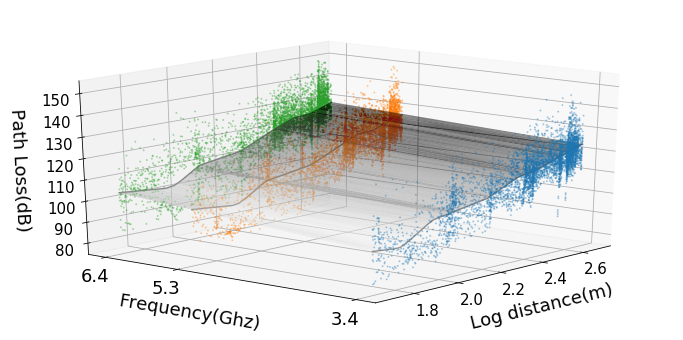

25.876409535720285
2001
7
1


RMSE(dB),train error,val error,test error
3.4Ghz,7.00515,7.06959,7.22095
5.3Ghz,7.02411,7.22810,7.13122
6.4Ghz,7.55075,7.62174,7.66845
Overall,7.19394,7.17624,7.17155


In [50]:
%autoreload
ann_model = None
ann_model = mlp_regression(X_train_bh, y_train_bh, (60, 60, 60, 60, 60,), 'relu', 'lbfgs')

print("<Bundang>")
mlp_train_multi_3dgraph_comb(ann_model, dataX_bh, dataY_bh, X_train_bh)

print(ann_model.loss_)
print(ann_model.n_iter_ )
print(ann_model.n_layers_)
print(ann_model.n_outputs_)
stat = np.array([mlp_prediction_error(ann_model,X_train_bh_34, y_train_bh_34),mlp_prediction_error(ann_model,X_val_bh_34, y_val_bh_34),mlp_prediction_error(ann_model,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(ann_model,X_train_bh_53, y_train_bh_53),mlp_prediction_error(ann_model,X_val_bh_53, y_val_bh_53),mlp_prediction_error(ann_model,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(ann_model,X_train_bh_64, y_train_bh_64),mlp_prediction_error(ann_model,X_val_bh_64, y_val_bh_64),mlp_prediction_error(ann_model,X_test_bh_64, y_test_bh_64),
                 mlp_prediction_error(ann_model,X_train_bh, y_train_bh), mlp_prediction_error(model,X_val_bh, y_val_bh), mlp_prediction_error(model,X_test_bh, y_test_bh)])

(pd.DataFrame(stat.reshape((4,3)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','val error','test error'],name='RMSE(dB)')))

In [7]:
print(X_train_bh.shape)
print(y_train_bh.shape)

(13875, 2)
(13875,)


In [4]:
# Instantiate a Gaussian Process model
# kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
# kernel = 1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) \
#    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
# gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.0)

In [8]:
X = X_train_bh
y = y_train_bh

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

GaussianProcessRegressor(alpha=0.0, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1e-05),
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

<Bundang>
(10, 13875)


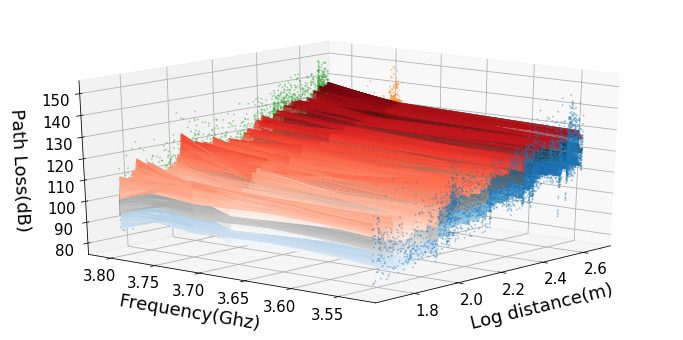

In [47]:
%autoreload
gp_model = gp

print("<Bundang>")
gp_train_multi_3dgraph_comb(gp_model, dataX_bh, dataY_bh, X_train_bh)

<Bundang>


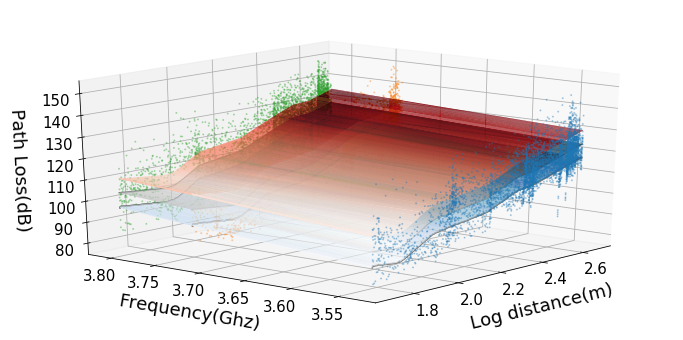

In [53]:
%autoreload
gp_model = gp

print("<Bundang>")
gp_ann_train_multi_3dgraph(gp_model, ann_model, dataX_bh, dataY_bh, X_train_bh)